#Importing Libraries

In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from google.colab import drive
from matplotlib import pyplot as plt
drive.mount('/content/drive')
from sklearn import metrics

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading the Dataset

In [38]:
df=pd.read_csv("/content/drive/MyDrive/pj/diabet/diabetes.csv")

#Exploring the Dataset


In [39]:
print(df.describe())
df.info()
print(df.isnull().sum())
df.dropna(inplace=True)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

# Preprocessing the Data

In [40]:
required_features=['Pregnancies','Glucose',
                   'BloodPressure','SkinThickness',
                   'Insulin','BMI',
                   'DiabetesPedigreeFunction','Age']
output_label='Outcome'

In [49]:
x_train, x_test, y_train, y_test = train_test_split(
df[required_features],
df[output_label],
test_size = 0.25)

#Creating the Model with Different n_neighbors number to find best score accuracy

In [50]:
n_n=[]
scores=[]
for i in range(2,50):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train,y_train)
  predict=model.predict(x_test)
  score=model.score(x_test,y_test)
  scores.append(score)
  n_n.append(i)
scores=np.array(scores)
best_score=scores.max()
kNN_n=scores.argmax()
print(" best score of models : ",best_score)
print(" KNN model n_neighbors : ",kNN_n)

 best score of models :  0.7760416666666666
 KNN model n_neighbors :  14


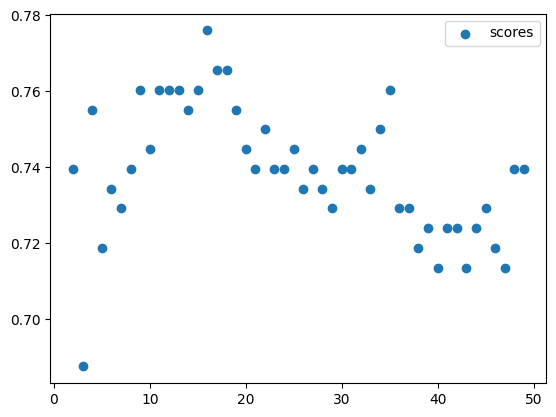

In [51]:
plt.scatter(n_n,scores,label="scores")
plt.legend()
plt.show()

768


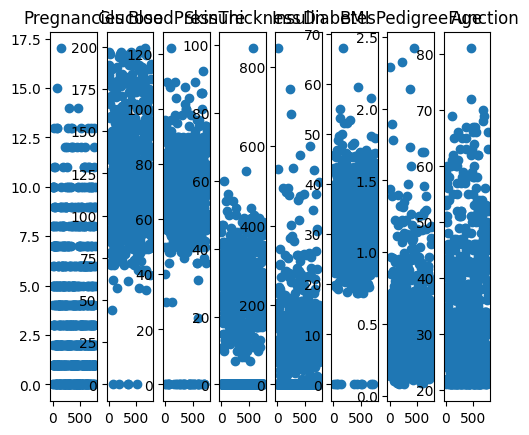

In [52]:
required_features=['Pregnancies','Glucose',
                   'BloodPressure','SkinThickness',
                   'Insulin','BMI',
                   'DiabetesPedigreeFunction','Age']
n = len(required_features)
print(df[required_features[1]].shape[0])
for i in range(n):
    plt.subplot(1, n + 1, i + 1)
    plt.scatter(np.arange(df[required_features[i]].shape[0]), df[required_features[i]].values)
    plt.title(required_features[i])

plt.show()

# findig the most effective component

In [53]:
required_features=['Pregnancies','Glucose',
                   'BloodPressure','SkinThickness',
                   'Insulin','BMI',
                   'DiabetesPedigreeFunction','Age']
output_label='Outcome'

for i in required_features:
  x_train, x_test, y_train, y_test = train_test_split(
  df[f'{i}'].array.reshape(-1, 1),
  df[output_label],
  test_size = 0.3)
  model=KNeighborsClassifier(n_neighbors=scores.argmax())
  model.fit(x_train,y_train)
  score=model.score(x_test,y_test)
  print("features: ",i," model score :",score*100)
  print("___________________________________")

features:  Pregnancies  model score : 67.53246753246754
___________________________________
features:  Glucose  model score : 69.26406926406926
___________________________________
features:  BloodPressure  model score : 61.038961038961034
___________________________________
features:  SkinThickness  model score : 59.307359307359306
___________________________________
features:  Insulin  model score : 63.63636363636363
___________________________________
features:  BMI  model score : 65.36796536796537
___________________________________
features:  DiabetesPedigreeFunction  model score : 61.038961038961034
___________________________________
features:  Age  model score : 68.3982683982684
___________________________________
